- errorbar
    - std deviation

In [1]:
import pandas as pd
import numpy as np

agents = ['Human', 'D2A', 'ReAct', 'LLMob', 'BabyAGI']
num_steps = 12
num_trials = 10 
data_records = []

base_dissatisfaction = {
    'Human': 35 * np.exp(-np.arange(num_steps) * 0.8) + 5,
    'D2A': 35 * np.exp(-np.arange(num_steps) * 0.6) + 8,
    'ReAct': 35 * np.exp(-np.arange(num_steps) * 0.4) + 12,
    'LLMob': 40 * (1 - np.log1p(np.arange(num_steps)) / np.log1p(num_steps)) + 15,
    'BabyAGI': np.linspace(40, 25, num_steps)
}

for agent in agents:
    for step in range(1, num_steps + 1):
        for trial in range(num_trials):
            # 获取基础值
            base_value = base_dissatisfaction[agent][step-1]
            noise = np.random.normal(loc=0, scale=2.0)
            final_value = base_value + noise
            
            # 添加一条记录
            data_records.append({
                'Step Index': step,
                'Dissatisfaction': final_value,
                'Agent': agent
            })

df = pd.DataFrame(data_records)

In [2]:
df

,Step Index,Dissatisfaction,Agent
0,1,39.744472,Human
1,1,38.260818,Human
2,1,41.076727,Human
3,1,39.505123,Human
4,1,42.000290,Human
...,...,...,...
595,12,26.357448,BabyAGI
596,12,27.989376,BabyAGI
597,12,24.096938,BabyAGI
598,12,21.590223,BabyAGI


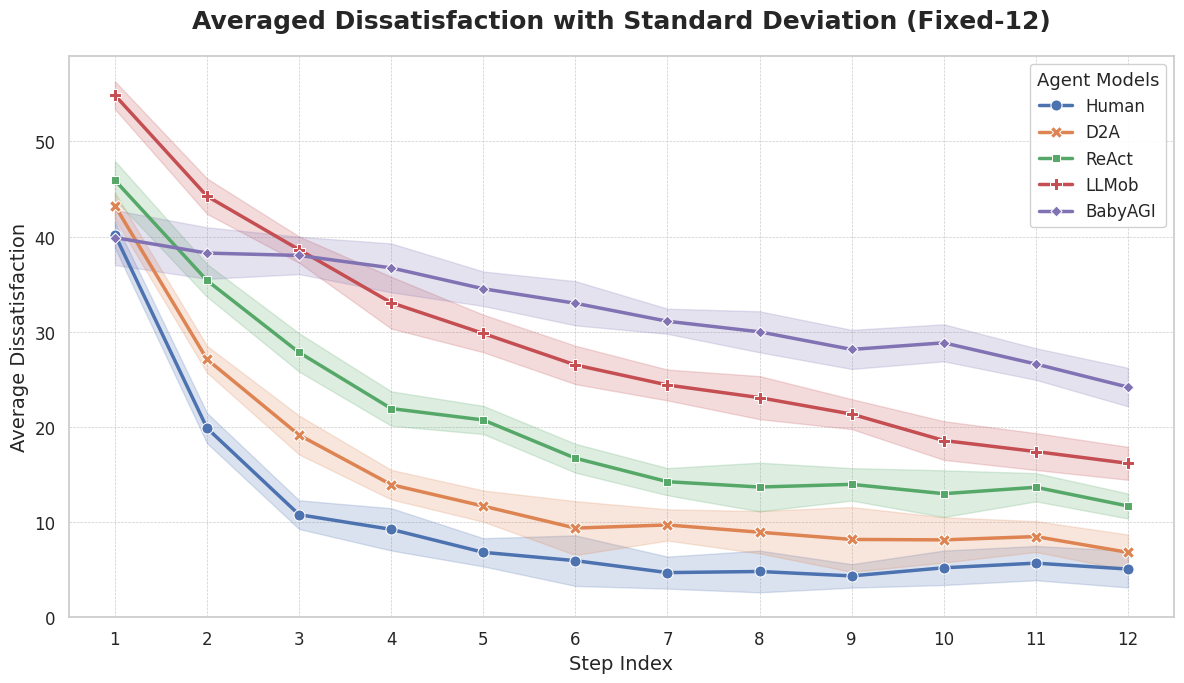

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# 'whitegrid' 风格非常适合科技论文
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# --- 3. 绘制核心图表 ---
# 这是最关键的一行代码
# - x, y, hue 分别指定了数据列
# - style 和 markers 让每个智能体的线条样式和标记点都不同，增强可读性
# - errorbar='sd' 明确告诉seaborn阴影部分是标准差(standard deviation)
lineplot = sns.lineplot(
    data=df,
    x='Step Index',
    y='Dissatisfaction',
    hue='Agent',
    style='Agent',
    markers=True,
    dashes=False,
    linewidth=2.5,
    markersize=8,
    errorbar='sd' # 'sd' 代表 standard deviation
)

# --- 4. 美化和定制图表 ---
# 设置标题
plt.title('Averaged Dissatisfaction with Standard Deviation (Fixed-12)', fontsize=18, fontweight='bold', pad=20)

# 设置坐标轴标签
plt.xlabel('Step Index', fontsize=14)
plt.ylabel('Average Dissatisfaction', fontsize=14)

# 设置坐标轴刻度
plt.xticks(ticks=range(1, num_steps + 1), fontsize=12)
plt.yticks(fontsize=12)

# 设置坐标轴范围，确保图表不拥挤
plt.xlim(0.5, num_steps + 0.5)
plt.ylim(bottom=0)

# 美化图例
legend = plt.legend(title='Agent Models', fontsize=12, title_fontsize=13)
legend.get_frame().set_alpha(0.9) # 设置图例背景半透明

# 添加网格线，使其更清晰
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# 使用紧凑布局，防止标签重叠
plt.tight_layout()

# --- 5. 显示或保存图表 ---
# plt.savefig('dissatisfaction_plot.png', dpi=300) # 保存为高分辨率图片
plt.show()